## Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

2026-02-17 17:59:44.456995: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-17 17:59:44.510218: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2026-02-17 17:59:46.222562: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


## Load data and plot

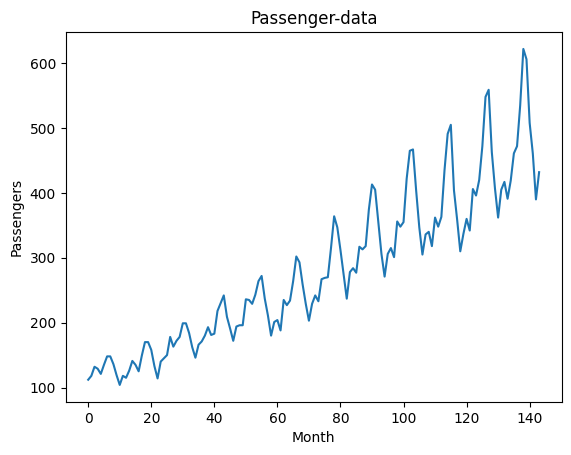

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

y = df["Passengers"].astype("float32").to_numpy()

plt.figure()
plt.plot(y)
plt.title("Passenger-data")
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.show()

## Normalize

In [3]:
y_min, y_max = y.min(), y.max()
y = (y - y_min) / (y_max - y_min)   # now y is 0..1

## Make prediction windows

In [4]:
W = 20  # TODO: choose window size
X, Y = [], []
for i in range(len(y) - W):
    X.append(y[i:i+W])
    Y.append(y[i+W])

X = np.array(X, dtype="float32")            # (N, W)
Y = np.array(Y, dtype="float32")            # (N,)
X = X[..., None]                             # (N, W, 1) for Keras

## (Optional) Plot sample window

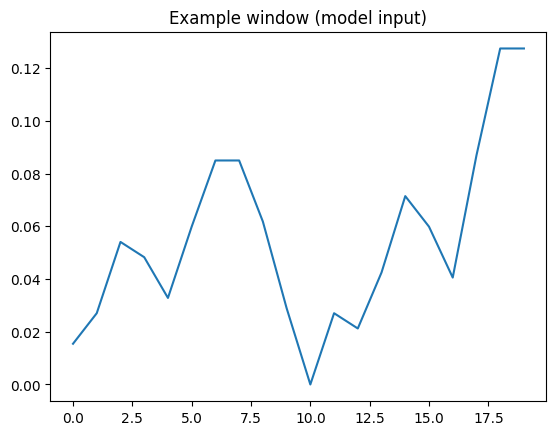

In [5]:
plt.figure()
plt.plot(X[0].squeeze())
plt.title("Example window (model input)")
plt.show()

## Train/val/test split

In [6]:
n = len(X)
n_train = int(n * 0.7)
n_val = int(n * 0.15)

X_train, Y_train = X[:n_train], Y[:n_train]
X_val,   Y_val   = X[n_train:n_train+n_val], Y[n_train:n_train+n_val]
X_test,  Y_test  = X[n_train+n_val:], Y[n_train+n_val:]

## Build model

In [7]:
model = keras.Sequential([
    layers.Input(shape=(W, 1)), # Input layer with same size as data
    
    layers.Dense(1) # Predicting one value
])

2026-02-17 17:59:47.250883: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


## Compile with optimizer

In [8]:
model.compile(
    optimizer="adam", 
    loss="mse", 
    metrics=["mae"]
    )

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20, 1)          │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

## Train (yay)

In [10]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=10,                     
    batch_size=32,
    verbose=1
)

Epoch 1/10


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - loss: 0.0530 - mae: 0.1818

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0449 - mae: 0.1673 - val_loss: 0.0266 - val_mae: 0.1267


Epoch 2/10


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0361 - mae: 0.1511

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0449 - mae: 0.1669 - val_loss: 0.0266 - val_mae: 0.1268


Epoch 3/10


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0435 - mae: 0.1687

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0439 - mae: 0.1655 - val_loss: 0.0266 - val_mae: 0.1269


Epoch 4/10


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0344 - mae: 0.1441

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0432 - mae: 0.1637 - val_loss: 0.0266 - val_mae: 0.1270


Epoch 5/10


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0449 - mae: 0.1673

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0421 - mae: 0.1621 - val_loss: 0.0266 - val_mae: 0.1271


Epoch 6/10


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0606 - mae: 0.1953

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0425 - mae: 0.1623 - val_loss: 0.0266 - val_mae: 0.1272


Epoch 7/10


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0521 - mae: 0.1813

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0437 - mae: 0.1646 - val_loss: 0.0266 - val_mae: 0.1272


Epoch 8/10


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0389 - mae: 0.1571

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0425 - mae: 0.1619 - val_loss: 0.0266 - val_mae: 0.1273


Epoch 9/10


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0443 - mae: 0.1652

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0428 - mae: 0.1636 - val_loss: 0.0266 - val_mae: 0.1273


Epoch 10/10


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0392 - mae: 0.1571

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0428 - mae: 0.1637 - val_loss: 0.0266 - val_mae: 0.1273


## Predict and "de-normalize"

In [11]:
test_loss, test_mae = model.evaluate(X_test, Y_test, verbose=0)
print("Test MAE:", test_mae)

pred = model.predict(X_test, verbose=0).squeeze()

pred = pred * (y_max - y_min) + y_min
Y_test = Y_test * (y_max - y_min) + y_min

Test MAE: 0.1645667552947998


## Plot

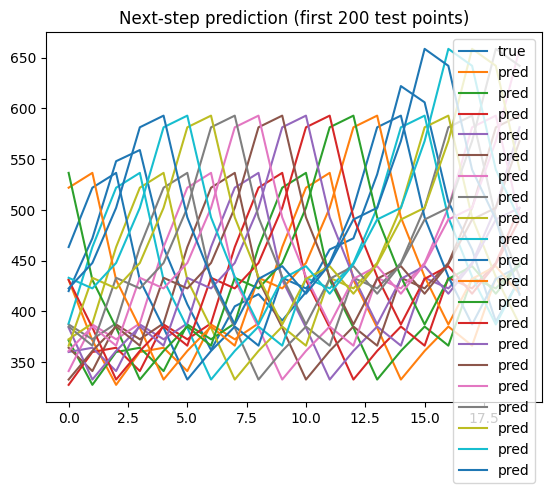

In [12]:
plt.plot(Y_test[:200], label="true")
plt.plot(pred[:200], label="pred")
plt.legend()
plt.title("Next-step prediction (first 200 test points)")
plt.show()